## Урок 10. Домашнее задание 

### 10.1 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика силуэтта? Стало лучше или хуже? Какое количество кластеров лучше, два или четыре?

In [1]:
import pickle
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

with open('clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)
    
X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

km_model = KMeans(n_clusters=4).fit(X)

print(f'Качество кластеризации по метрике силуэтта: {silhouette_score(X, km_model.labels_)}')

Качество кластеризации по метрике силуэтта: 0.4417501080615704


* Метрика силуэтта уменьшилась по сравнению с моделью для 2 кластеров;
* Стало хуже;
* Для данного набора данных два кластера лучше четырех.


### 10.2 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика *AMI*? Стало лучше или хуже? Какое количество кластеров лучше по метрике AMI?

In [2]:
from sklearn.metrics import adjusted_mutual_info_score

score = adjusted_mutual_info_score(Y, km_model.labels_, average_method='arithmetic')
print(f'Качество кластеризации по метрике AMI: {score}')

Качество кластеризации по метрике AMI: 0.5827727212133395


* Метрика AMI уменьшилась по сравнению с моделью для 2 кластеров;
* Стало хуже;
* Для данного набора данных два кластера лучше четырех.


### 10.3 Домашнее задание высокого уровня

Загрузите датасет `clustering_hw.csv` из приложенной директории `data` и визуализируйте данные. Должно получится как-то так:

![clustering_hw](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/clustering_hw.png)

В рамках домашней работы

1. вычислите оптимальное количество кластеров $k$
1. обучите k-means с количеством кластеров  $k$
1. к какому кластеру принадлежит точка $x=(5, 8)$? к какому кластеру принадлежит точка $x=(0, 5)$? Они принадлежат к разным кластерам или одному?
1. Каково качество кластеризации по AMI

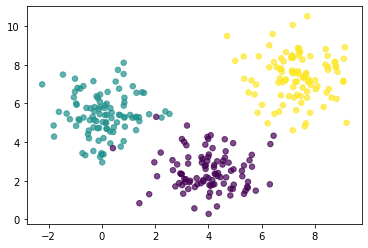

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df_clustering = pd.read_csv('7.10_clustering_hw.csv')

plt.scatter(df_clustering.x1, df_clustering.x2, s=30, c=df_clustering.y, alpha=0.7)
plt.show()

In [4]:
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import euclidean_distances

data = df_clustering[['x1', 'x2']]
y = df_clustering.y

metrics = []
MAX_CLUSTERS=10
for cluster_num in range(1, MAX_CLUSTERS):
    km_model = KMeans(n_clusters=cluster_num, random_state=17).fit(data)
    centroids, labels = km_model.cluster_centers_, km_model.labels_
    metric = 0
    for centroid_label in range(cluster_num):
        metric += euclidean_distances(
            data[labels==centroid_label],
            centroids[centroid_label,:].reshape(1, -1)
        ).sum(axis=0)[0]
    print('cluster_num %s, metric %s' % (cluster_num, metric))
    metrics.append(metric)

cluster_num 1, metric 1105.8973781101085
cluster_num 2, metric 663.5712032768091
cluster_num 3, metric 374.6589714184052
cluster_num 4, metric 348.4057548247144
cluster_num 5, metric 323.00794391318857
cluster_num 6, metric 302.2533932312632
cluster_num 7, metric 281.67331044725154
cluster_num 8, metric 265.1796300290921
cluster_num 9, metric 252.45166280720218


best cluster num: 3


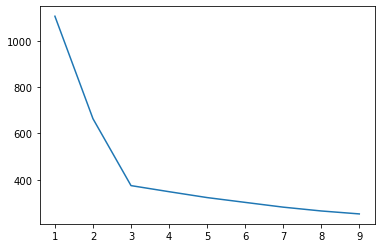

In [5]:
D = []
for i in range(0, len(metrics)-1):
    d = abs(metrics[i+1]-metrics[i])/abs(metrics[i]-metrics[i-1])
    D.append(d)
print('best cluster num: %d' % (np.argmin(D)+1))

plt.plot([i+1 for i in range(len(metrics))], metrics)
plt.show()

In [6]:
km_model = KMeans(n_clusters=3).fit(data)
x1 = np.array([5, 8])
x2 = np.array([0, 5])
print(f'Точка с координатами (5, 8) принадлежит кластеру: {km_model.predict(x1.reshape(1, -1))}')
print(f'Точка с координатами (0, 5) принадлежит кластеру: {km_model.predict(x2.reshape(1, -1))}')

Точка с координатами (5, 8) принадлежит кластеру: [0]
Точка с координатами (0, 5) принадлежит кластеру: [1]


Точки с координатами (5, 8) и (0, 5) принадлежат разным кластерам.

In [7]:
score = adjusted_mutual_info_score(y, km_model.labels_, average_method='arithmetic')
print(f'Качество кластеризации по метрике AMI: {score}')

Качество кластеризации по метрике AMI: 0.9700074953683859


### Заключение

Мы познакомились с двумя метриками

* Silhouette. Её используем, когда есть только сами объекты, а метки кластеров отсутствуют в обучающей выборке
* AMI. Её используем, когда известны "истинные" метки кластеров

Метрик намного больше - о них можно почитать [ в документации sklearn](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics)